In [2]:
import sys
sys.path.insert(1, './env')
sys.path.insert(1, './agents')

import gym
import pylab
import random
import aa_gun
import strategy_imitation, sarsa
import numpy as np
from collections import deque
import keras
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt


EPISODES = 30000

Using TensorFlow backend.


In [3]:
# In case of CartPole-v1, maximum length of episode is 500
#env = aa_gun.AA_gun_simple0_env()
#env = gym.make('AirRaid-ram-v0')
#env = gym.make('Robotank-ramNoFrameskip-v0')
env = gym.make('Seaquest-ramNoFrameskip-v0')
#env=CartPoleEnv9()
# get size of state and action from environment
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

#agent = DoubleDQNAgent(state_size, action_size)
agent = sarsa.SarsaAgent(state_size, action_size)
agent.train_start=3000
#agent = strategy_imitation.ImitAgent(state_size, action_size)
agent.render=True

scores, episodes = [], []
reward_lst = []
s_list=[]
a_list=[]

for e in range(EPISODES):
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state, [1, state_size])

    while not done:
        if (e in range(100,300)) or (e in range(300,306)) or (e in range(400,406)) or (e in range(500,506)) or (e in range(600,604)):
            if agent.render:
                env.render()

        # get action for the current state and go one step in environment
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        # if an action make the episode end, then gives penalty of -100
        

        # save the sample <s, a, r, s'> to the replay memory
        reward_curr=reward
        #if done:
        #    reward_curr -= 100
        agent.append_sample(state, action, reward_curr, next_state, done)
        #if next_state[0,11]!=reward:
        #    print('state[13]!=reward',state[0,11],reward)
        #
        s_list.append(state)
        a_list.append(action)
        reward_lst.append(reward)
        #
        
        # every time step do the training
        agent.train_model()
        score += reward
        state = next_state
        
        print(state)

        if done:
            # every episode update the target model to be same with model
            agent.update_target_model()

            # every episode, plot the play time
            scores.append(score)
            episodes.append(e)
            pylab.plot(episodes, scores, 'b')
            #pylab.savefig("./save_graph/aa_gun_dqn.png")
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon)

            # if the mean of scores of last 10 episode is bigger than 490
            # stop training

    # save the model
    #if e % 50 == 0:
    #    agent.model.save_weights("./save_model/aa_gun_dqn.h5")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               12900     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

[[  0 215 255   0   7   0 255  26 175 144  24 170 132   0  12   6  50 134
  232 253  56 253 100 253 192 253  80 254   0 254 208 175 175 175   0   0
    4   1   1   1   0   0   0   0 200 200 200 200   0   1   2   3 255 255
  255   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0  71   0
    0   3   3 196  96  48  32  15  14   0   0   0   0   0   0   0   0   9
    1   1   1   5   1   0   2  13   0 255 255   0  64   0   0   0   0   0
    0   0   0   0   0   0   0   1   1   0   0  96   7   0   3 196 215 254
  214 244]]
[[  0 216 248   0  10   0 255  26 175 144  24 170 132   0  12   6  50 134
  218 253  41 253  86 253 192 253  80 254   0 254 207 176 176 176   0   0
    4   1   1   1   0   0   0   0 200 200 200 200   0   1   2   3 255 255
  255   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0  70   0
    0   4   4 212  96  48  32   2   4   0   0   0   0   0   8   8   0   8
    0   0   0   6   0   0   1  13   0 255 255   0  64   0   0   0   0   0
    0   0   0   0   0   0 

[[  0 208 138   0   6   0 255  26 175 144  24 170 132   0  12   6  50 134
  231 253  71 253 115 253 164 253  80 254   0 254 114  13  13  13   0   0
    4   1   1   1   4   1   1   1 200 200 200 200 255 255   2   3 255 255
  255   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0 104   0
    0  50  50 150 215  48  32  10   4   0   0   0   0   0   0   8   0  10
    2   2   2   4   2   0   2  18   0 255 255   0  58   0   0   0   0   0
    0  10   0   0   0   0   0   1   1   0   0  96   7   0   3 196 215 254
  136 246]]
[[  0 209 138   0   6   0 255  26 175 144  24 170 132   0  12   6  50 134
  231 253  71 253 115 253 192 253  80 254   0 254 114  13  13  13   0   0
    4   1   1   1   4   1   1   1 200 200 200 200 255 255 255 255 255 255
  255   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0 105   0
    0  50  50 119 215  48  32  13  10   0   0   0   0   0   0   0   0  10
    2  16  16   4   2   0   2  17   0 255 255   0  58   0   0   0   0   0
    0  10   0   0   0   0 

[[  0 179 205   0   6   0 255  26 175 144  24 170 132   0  12   6  50 134
  228 253  56 253 100 253 164 253  80 254   0 254 208 208 208 208   0   0
    4   1   1   1   0   0   0   0 200 200 200 200   0   1   2   3 255 255
  255   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0  76   0
    0   0   0 101  96  48  32  14  12   0   0   0   0   0   0   8   0   9
    1   0   0   1   1   0   0  13   0 255 255   0  61   0   1   0   0   0
    0  10   0   0   0   0   0   1   1   0   0  96   7   0   3 196 215 254
  214 244]]
[[  0 180 205   0  15   0 255  26 175 144  24 170 132   0  12   6  50 134
  228 253  56 253 100 253 164 253  80 254   0 254 208 208 208 208   0   0
    4   1   1   1   0   0   0   0 200 200 200 200   0   1   2   3 255 255
  255   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0  76   0
    0   0   0 101  96  48  32  14  12   0   0   0   0   0   0   8   0   9
    1   0   0   1   1   0   2  13   0 255 255   0  62   0   1   0   0   0
    0  10   0   0   0   0 

[[  0 156 216   0  15   0 255  26 175 144  24 170 132   0  12   6  50 134
  219 253   0 253  86 253 192 253  16 254   0 254 254 129 129 194   0   0
    1   4   4   1   1   4   4   0 200 200 200 200 255 255 255 255 255 255
  255   0   0   0  32   2   0   0   0   0   0   0   0   0   0   0  52   0
    0 117 143   3  98  48  32  10   4   0   0   0   0   0   0   0   0   0
    8   8   0   7   0   0   1  18   0 255 255   0  60   0   0   0   0   0
    0  11   0   0   0   0   0   1   1   0   0  96   7   0   3 196 215 254
  214 244]]
[[  0 157 216   0   5   0 255  26 175 144  24 170 132   0  12   6  50 134
  219 253   0 253  86 253 178 253  16 254   0 254 254 129 129 194   0   0
    1   4   4   1   1   4   4   0 200 200 200 200 255 255 255 255 255 255
  255   0   0   0  32   2   0   0   0   0   0   0   0   0   0   0  53   0
    0 117 143 243  98  48  32  13  10   0   0   0   0   0   0   0   0   0
    8   8   0   7   0   0   1  19   0 255 255   0  60   0   0   0   0   0
    0  11   0   0   0   0 

[[  0 142  16   0   6   0 255  26 175 144  24 170 132   0  12   6  50 134
  215 253   0 253  86 253 178 253  32 254   0 254  89  38  38 167   0   0
    1   4   4   4   1   4   4   0 200 200 200 200 255 255 255 255 255 255
  255   0   0   0  64   2   0   0   0   0   0   0   0   0   0   0  44   0
    0  33 136 146  88  48  32   0   0   0   0   0   0   0   0   0   0   0
    8  25   8   3   0   0   1  23   0 255 255   0  53 139   0   0   0   0
    0  12   0   0   0   0   0   1   1   0   0  96   7   0   3 196 215 254
  214 244]]
[[  0 143  16   0   6   0 255  26 175 144  24 170 132   0  12   6  50 134
  215 253   0 253  86 253 178 253  32 254   0 254  89  38  38 167   0   0
    1   4   4   4   1   4   4   0 200 200 200 200 255 255 255 255 255 255
  255   0   0   0  64   2   0   0   0   0   0   0   0   0   0   0  45   0
    0  33 136 115  88  48  32   3   6   0   0   0   0   0   0   0   0   0
    8  25   8   3   0   0   1  22   0 255 255   0  53 144   0   0   0   0
    0  12   0   0   0   0 

[[  0 103 240   0   5   0 255  26 175 144  24 170 132   0  12   6  50 134
  178 253  27 253 204 253 178 253  48 254   0 254 178 178 178 231   0   0
    1   4   4   1   0   0   0   1   8   8   8 200   0   1   2 255 255 255
  255   0   0   0  96   2   0   0   0   0   0   0   0   0   0   0  51   0
    0   0 158  19  96  48  32  11   6   0   0   0   0   0   0   0   0   5
    5   5   0   6   0   0   1  35   0 255 255   0  46  87   0   0   0   0
    0  15   0   0   0   1   1   1   1   0   0  96   7   0   3 196 215 254
  214 244]]
[[  0 104 131   0  10   0 255  26 175 144  24 170 132   0  12   6  50 134
  178 253  27 253 204 253 178 253  48 254   0 254 178 178 178 231   0   0
    1   4   4   1   0   0   0   1   8   8   8 200   0   1   2 255 255 255
  255   0   0   0  96   2   0   0   0   0   0   0   0   0   0   0  50   0
    0   0 158  35  96  48  32  14  12   0   0   0   0   0   8   0   0   5
    5   5   2   5   2   0   0  34   0 255 255   0  46  92   0   0   0   0
    0  14   0   0   0   1 

[[  0  59 175   0   7   0 255  26 175 144  24 170 132   0  12   6  50 134
  192 253  27 253 204 253 192 253  64 254   0 254   1   1   1 238   0   0
    1   4   4   1   1   4   4   1   8   8   8 200 255   1   2 255 255 255
  255   0   0   0 128   2   0   0   0   0   0   0   0   0   0   0  67   0
    0   0  35   4  50  48  32   7  14   0   0   0   0   0   0   0   0   6
    6   6   0   1   0   0   2  48   0 255 255   0  40   0   0   0   0   0
    0  11   0   0   0   1   1   1   1   0   0  96   7   0   3 196 215 254
  214 244]]
[[  0  60 175   0   9   0 255  26 175 144  24 170 132   0  12   6  50 134
  192 253  27 253 204 253 192 253  64 254   0 254   2   2   2 239   0   0
    1   4   4   1   1   4   4   1   8   8   8 200 255   1   2 255 255 255
  255   0   0   0 128   2   0   0   0   0   0   0   0   0   0   0  66   0
    0   0  35  20  34  48  32  10   4   0   0   0   0   0   8   8   0   6
    6   6   0   0   0   0   1  49   0 255 255   0  40  69   0   0   0   0
    0  15   0   0   0   1 

[[  0  56 155   0   5   0 255  26 175 144  24 170 132   0  12   6  50 134
  178 253  27 253 204 253 192 253   0 254   0 254 208 208 208 208   0   0
    1   4   0   1   0   0   0   0   8   8   8 200   0   1   2   3 255 255
  255   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0  76   0
    0   0   0 101  96  48  32   3   6   0   0   0   0   0   0   8   0   5
    5   5   0   6   2   0   1  13   0 255 255   0  16   0   1   0   0   0
    0  15   0   0   0   1   1   1   1   0   0  96   7   0   3 196 215 254
  136 246]]
[[  0  57 155   0   5   0 255  26 175 144  24 170 132   0  12   6  50 134
  178 253  27 253 204 253 178 253   0 254   0 254 208 208 208 208   0   0
    1   4   0   1   0   0   0   0   8   8   8 200   0   1   2   3 255 255
  255   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0  76   0
    0   0   0 101  96  48  32   3   6   0   0   0   0   0   0   8   0   5
    5   5   0   6   2   0   1  13   0 255 255   0  16   0   1   0   0   0
    0  15   0   0   0   1 

[[  0  54  12   0  15   0 255  26 175 144  24 170 132   0  12   6  50 134
  229 253  13 253 100 253 178 253   0 254   0 254 227 227 156 156   0   0
    1   1   4   4   1   1   4   4 200 200 200 200 255 255 255 255 255 255
  255   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0  70  29
   29 131 131 212  48  66  32  13  10   0   0   0   0   0   0   8   0   1
    1   9   9   2   1   0   1  22   0 255 255   0  61  11   0   0   0   0
    0  13   0   0   0   1   1   1   1   0   0  96   7   0   3 196 215 254
  214 244]]
[[  0  55  12   0   9   0 255  26 175 144  24 170 132   0  12   6  50 134
  229 253  13 253 100 253 178 253   0 254   0 254 228 228 155 155   0   0
    1   1   4   4   1   1   4   4 200 200 200 200 255 255 255 255 255 255
  255   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0  69  30
   30 130 130 228  32  50  32   0   0   0   0   0   0   0   8   8   0   1
    1   9   9   2   1   0   1  23   0 255 255   0  61   6   0   0   0   0
    0  13   0   0   0   1 

[[  0  41  80   0   6   0 255  26 175 144  24 170 132   0  12   6  50 134
  232 253  13 253 100 253 164 253   0 254   0 254 168 215 168 215   0   0
    1   4   1   4   0   0   0   0 200 200 200 200   0   1   2   3 255 255
  255   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0  77   0
    0   0   0  85  96  48  32   5  10   0   0   0   0   0   0   0   0   1
    9   1   9   5   1   0   0  13   0 255 255   0  64   0   0   0   0   0
    0  12   0   0   0   1   1   1   1   0   0  96   7   0   3 196 215 254
  214 244]]
[[  0  42  80   0   5   0 255  26 175 144  24 170 132   0  12   6  50 134
  232 253  13 253 100 253 164 253   0 254   0 254 169 214 169 214   0   0
    1   4   1   4   0   0   0   0 200 200 200 200   0   1   2   3 255 255
  255   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0  78   0
    0   0   0  69  96  48  32   8   0   0   0   0   0   0   0   0   0   1
    9   1   9   5   1   0   0  14   0 255 255   0  64   0   0   0   0   0
    0  12   0   0   0   1 

[[  0  30 100   0   7   0 255  26 175 144  24 170 132   0  12   6  50 134
  234 253  13 253 100 253 192 253   0 254   0 254   4 123   4 123   0   0
    1   4   1   4   1   4   1   4 200 200 200 200 255 255 255 255 255 255
  255   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0  70  46
  114  46 114 212   2  35  32   4   8   0   0   0   0   0   0   0   0   1
    9   1   9   7   1   0   2  20   0 255 255   0  63   0   0   0   0   0
    0  12   0   0   0   1   1   1   1   0   0  96   7   0   3 196 215 254
  214 244]]
[[  0  31 100   0  11   0 255  26 175 144  24 170 132   0  12   6  50 134
  234 253  13 253 100 253 192 253   0 254   0 254   4 123   4 123   0   0
    1   4   1   4   1   4   1   4 200 200 200 200 255 255 255 255 255 255
  255   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0  69  46
  114  46 114 228   2  35  32   7  14   0   0   0   0   0   8   8   0   1
    9   1   9   7   1   0   2  20   0 255 255   0  63   0   0   0   0   0
    0  12   0   0   0   1 

[[  0  18 221   0   5   0 255  26 175 144  24 170 132   0  12   6  50 134
  231 253  13 253 100 253 178 253  16 254   0 254  96  31  96 228   0   0
    1   4   1   1   1   4   1   1 200 200 200 200 255 255 255 255 255 255
  255   0   0   1  32   0   0   0   0   0   0   0   0   0   0   0  89 135
   24 135 114 149 232  57  32   0   0   0   0   0   0   0   0   8   0  17
   25  17   0   4   0   0   1  29   0 255 255   0  56  65   0   0   0   0
    0  15   0   0   0   1   1   1   1   0   0  96   7   0   3 196 215 254
  214 244]]
[[  0  19 221   0   6   0 255  26 175 144  24 170 132   0  12   6  50 134
  231 253  13 253 100 253 178 253  16 254   0 254  96  31  96 228   0   0
    1   4   1   1   1   4   1   1 200 200 200 200 255 255 255 255 255 255
  255   0   0   1  32   0   0   0   0   0   0   0   0   0   0   0  90 135
   24 135 114 118 232  57  32   3   6   0   0   0   0   0   0   8   0  17
   25  17   0   4   0   0   1  28   0 255 255   0  56  60   0   0   0   0
    0  15   0   0   0   1 


Epoch 1/2
500/500 [==============================] - 1s 1ms/step - loss: 150.6522
Epoch 2/2
500/500 [==============================] - 0s 31us/step - loss: 146.9158
Epoch 1/2
500/500 [==============================] - 0s 21us/step - loss: 146.9903
Epoch 2/2
500/500 [==============================] - 0s 22us/step - loss: 145.7753
Epoch 1/2
500/500 [==============================] - 0s 22us/step - loss: 147.8212
Epoch 2/2
500/500 [==============================] - 0s 23us/step - loss: 145.3541
Epoch 1/2
500/500 [==============================] - 0s 21us/step - loss: 141.3405
Epoch 2/2
500/500 [==============================] - 0s 19us/step - loss: 142.8385
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 140.4621
Epoch 2/2
500/500 [==============================] - 0s 23us/step - loss: 142.5241
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 141.2187
Epoch 2/2
500/500 [==============================] - 0s 24us/step - loss: 138.9152
Epoc

KeyboardInterrupt: 

In [5]:
def make_sar_table(s,a,r):
    #print(np.array(a,ndmin=2).T.shape)
    #print(np.array(r,ndmin=2).T.shape)
    #print(np.array(s,ndmin=2)[:,0,:].shape)
    return np.hstack( (np.array(s,ndmin=2)[:,0,:],np.array(a,ndmin=2).T,np.array(r,ndmin=2).T) )

0.003353658536585366


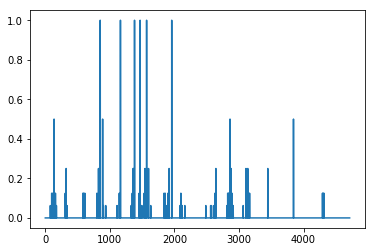

In [6]:
import matplotlib.pyplot as plt
print(np.mean(reward_lst))
plt.plot(reward_lst)

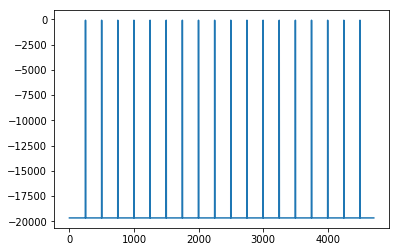

In [8]:
plt.plot(agent.r_disco)
#plt.plot(agent.d*20)

In [ ]:
np.mean(reward_lst)

In [ ]:
np.mean(score)

In [ ]:
#Чтобы анализировать разрешимость задачи
def replicate_reward(sar,border=0,wanted_part=0.5):
    part = np.mean(sar[:,-1:]>border)
    if part==0:
        print('ERROR')
        return(sar)
    else:
        while part<wanted_part:
            sar=np.vstack((sar,sar[np.where(sar[:,-1:]>border)[0],:]))
            part = np.mean(sar[:,-1:]>border)
        print(part)
        return(sar)

In [ ]:
sar=make_sar_table(s_list,a_list,reward_lst)
sar=replicate_reward(sar)
X=sar[1:,:]
Y=sar[:-1,:]
Y=sar[:-1,-1:]
Y=sar[1:,-1:]
sar_width=X.shape[1]
nn = Sequential()
nn.add(Dense(200, input_dim=sar_width, activation='relu',
                kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))
nn.add(Dense(200, activation='relu',
                kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
nn.add(Dense(200, activation='relu',
                kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
#nn.add(Dense(sar_width, activation='linear',
#                kernel_initializer='he_uniform'))
nn.add(Dense(1, activation='linear',
                kernel_initializer='he_uniform'))

nn.summary()
nn.compile(loss='mse', optimizer=Adam(lr=0.001))
l=X.shape[0]
X_train=X[:int(l/2),:]
Y_train=Y[:int(l/2),:]
X_test=X[int(l/2):,:]
Y_test=Y[int(l/2):,:]
nn.fit(X_train, Y_train, batch_size=1200,epochs=30000, verbose=1)

In [ ]:
Y_pred=np.array(nn.predict(X_test),ndmin=2)
mse = np.mean((Y_pred-Y_test)**2)
print(mse)
rmae=np.mean(np.abs(Y_pred-Y_test))/np.mean(np.abs(Y_test))
print(rmae)
rmae_diversed=np.mean(np.abs(Y_pred-Y_test),axis=0)/np.mean(np.abs(Y_test),axis=0)
print(rmae_diversed)

In [ ]:
colnumn_num=-1
plt.plot(Y_pred[:3000,colnumn_num])
plt.plot(Y_test[:3000,colnumn_num])
plt.show()

In [ ]:
#train (переобучение?)
Y_pred=np.array(nn.predict(X_train),ndmin=2)
mse = np.mean((Y_pred-Y_train)**2)
print(mse)
rmae=np.mean(np.abs(Y_pred-Y_train))/np.mean(np.abs(Y_train))
print(rmae)
rmae_diversed=np.mean(np.abs(Y_pred-Y_train),axis=0)/np.mean(np.abs(Y_train),axis=0)
print(rmae_diversed)

colnumn_num=-1
plt.plot(Y_pred[:1300,colnumn_num])
plt.plot(Y_train[:1300,colnumn_num])
plt.show()

In [ ]:
import xgboost as xgb
xgbparams = {
    'booster':'gbtree',
    'metric':'mse',
    'objective':'reg:squarederror',
    'verbosity':0,
    'max_depth': 7,
    'n_estimators': 90,
    'eta': 0.3,
    'nthreads': 2,
    'seed':0
}
nn=xgb.XGBRegressor(**xgbparams)
nn.fit(X_train[:int(l/4),:], Y_train[:int(l/4),:],
           eval_set=[(X_train[int(l/4):,:], Y_train[int(l/4):,:])],
           verbose=True)

In [ ]:
import pandas as pd
df=pd.DataFrame(sar)
df[df[13]>0]